In [ ]:
import os
import time
import requests
from lxml import etree
import pandas as pd
from bs4 import BeautifulSoup
import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import re
import csv
import json
import requests
import random
import os
import time

In [2]:
headers = {
  "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
  "Accept-Language": "zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6",
  "Cache-Control": "max-age=0",
  "Connection": "keep-alive",
  "Referer": "https://www.dianping.com/shenzhen/ch10/o3",
  "Sec-Fetch-Dest": "document",
  "Sec-Fetch-Mode": "navigate",
  "Sec-Fetch-Site": "same-origin",
  "Sec-Fetch-User": "?1",
  "Upgrade-Insecure-Requests": "1",
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 Edg/123.0.0.0",
  "sec-ch-ua-mobile": "?0"
}

cookies={
  "navCtgScroll": "0",
  "_lxsdk_cuid": "18e69f73b3dc8-0227d3fb55f1c6-4c657b58-13c680-18e69f73b3dc8",
  "_lxsdk": "18e69f73b3dc8-0227d3fb55f1c6-4c657b58-13c680-18e69f73b3dc8",
  "_hc.v": "315e914a-da94-23ba-5ee7-d53b7be2e520.1711176105",
  "WEBDFPID": "9yx82v5yx0v851uzz64wy62022194z2281v3z9y492x97958vw654zxv-2026536109663-1711176109663YISQUWGfd79fef3d01d5e9aadc18ccd4d0c95072601",
  "ua": "%E7%82%B9%E5%B0%8F%E8%AF%848793679062",
  "ctu": "b764f0d09af3d6815ec1347f5abe8697c5387a09b46bab9327703cec4d39bdc8",
  "s_ViewType": "10",
  "qruuid": "0b8d838c-4b3f-4d54-9eb6-2863a3f15679",
  "dplet": "0ba10c2857ffd52cd771064c402fb4e8",
  "dper": "0202b01e7f9a90c41ceaabcd955e2a2dba4a1c97b376e355c153c7aece0f3ad87a018143a7301912c5ccc1ee9d88b9ed0a536c3deb711fe68acd000000004f1f00003253c1430f99030e9b0c92660d391f86c4bf11502214c00a81db964d0b5574ea82f96a2c5e417cfce44522a57b1304f6",
  "fspop": "test",
  "_lx_utm": "utm_source%3Dbing%26utm_medium%3Dorganic",
  "ll": "7fd06e815b796be3df069dec7836c3df",
  "Hm_lvt_602b80cf8079ae6591966cc70a3940e7": "1712806317,1712980126,1713061776,1713352241",
  "cy": "7",
  "cye": "shenzhen",
  "Hm_lpvt_602b80cf8079ae6591966cc70a3940e7": "1713352262",
  "_lxsdk_s": "18eebc06dd7-0c8-c96-0cd%7C%7C118"
}

In [ ]:
def save_progress(zy_i, page, index):
    """‰øùÂ≠òÁ¨¨pageÈ°µÔºåÁ¨¨indexÊù°ÁöÑÊï∞ÊçÆÂà∞progressÊñá‰ª∂‰∏≠"""
    with open('Â§ß‰ºóÁÇπËØÑprogress.txt', 'w') as file:
        file.write(f'{zy_i},{page},{index}')


def load_progress():
    if os.path.exists('Â§ß‰ºóÁÇπËØÑprogress.txt'):
        with open('Â§ß‰ºóÁÇπËØÑprogress.txt', 'r') as file:
            """Â¶ÇÊûúËØªÂà∞Êñá‰ª∂‰∏≠‰øùÁïôÁöÑ‰ø°ÊÅØÔºåÂ∞±ËØªÂèñÂØπÂ∫îÁöÑÊï∞ÊçÆ"""
            progress = file.read().strip().split(',')
            if len(progress) == 3:
                return int(progress[0]), int(progress[1]), int(progress[2])
    return 1, 1, 1

def crawl(url):
    """ÂàÜÊûê‰∏ªÈ°µÈù¢ÊèêÂèñÂØπÂ∫îÁöÑËèúÁ≥ªÂêçÂçï"""
    response = requests.get(url=url, cookies=cookies, headers=headers)
    content = response.text
    txt = etree.HTML(content)
    start_cx, start_page, start_index = load_progress()
    print(start_cx, start_page, start_index)
    
    for i in range(start_cx, 37):
        name = txt.xpath(f'//*[@id="classfy"]/a[{i}]/span/text()')[0]
        print(f"ÂΩìÂâçÊ≠£Âú®Áà¨Âèñ{name}")
        fl = txt.xpath(f'//*[@id="classfy"]/a[{i}]/@href')[0]
        List_index(fl, i, start_page, start_index)
        
        start_page=1

def List_index(fl, start_cx, start_page, start_index):
    """ÂØπÊØè‰∏™ËèúÁ≥ªËøõË°åÊãÜËß£ÔºåËØ•ÂáΩÊï∞ÈúÄË¶Å‰º†ÂÖ•ÊØè‰∏Ä‰∏™ËèúÁ≥ªÁöÑÈìæÊé•ÔºåÁºñÂè∑ÔºåÊØè‰∏ÄÈ°µÁöÑÂºÄÂßãÔºåÊØè‰∏ÄÊù°ÁöÑÂºÄÂßãÔºåÊñπ‰æøÊåÅ‰πÖÂåñ"""
    www = []
    for page in range(start_page, 51):
        fl = fl + f'p{page}'
        response1 = requests.get(url=fl, cookies=cookies, headers=headers, timeout=20)  
        time.sleep(2)
        content1 = response1.text
        txt1 = etree.HTML(content1)
        for a in range(start_index, 16):
            w = Data_analysis(txt1, a, page)
            www.append(w)
            down_load(www)
            www.clear()
            time.sleep(random.uniform(1,2))
            save_progress(start_cx, page, a + 1)
        start_index=1

def Data_analysis(txt1, a, page):
    """Ëß£ÊûêËØ¶ÁªÜÊï∞ÊçÆÈ°µÈù¢"""
    try:
        Restaurant_name = txt1.xpath(f'//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[1]/a/h4/text()')[0]  # Â∫óÈì∫ÂêçÁß∞
    except Exception as e:
        Restaurant_name = "NULL"

    try:
        pj_count = txt1.xpath(f'//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[2]/a[1]/b/text()')[0]  # ËØÑËÆ∫Êï∞Èáè
        pj_count = pj_count + " Êù°ËØÑËÆ∫"
    except Exception as e:
        pj_count = "NULL"

    try:
        per_price = txt1.xpath(f'//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[2]/a[2]/b/text()')[0]  # ‰∫∫ÂùáÊ∂àË¥π
        per_price = "‰∫∫Âùá " + per_price
    except Exception as e:
        per_price = "NULL"

    try:
        main_shell = txt1.xpath(f'//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[3]/a[1]/span/text()')[0]  # ÂîÆÂçñ‰∏ªÈ£ü
    except Exception as e:
        main_shell = "NULL"

    try:
        Business_district = txt1.xpath(f'//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[3]/a[2]/span/text()')[0]  # ÂïÜÂúà‰ø°ÊÅØ
    except Exception as e:
        Business_district = "NULL"

    try:
        Recommended_dish = txt1.xpath(f'string(//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[4])')  # Êé®ËçêËèúÁ≥ª
        tjc = remove_newlines(Recommended_dish)
        qwer = convert_list_to_string(tjc)
    except Exception as e:
        qwer = "NULL"
    try:
        Tg = txt1.xpath(f'string(//*[@id="shop-all-list"]/ul/li[{a}]/div[3]/div)')  # Âõ¢Ë¥≠
        Tg1 = remove_newlines(Tg)
        Tg2 = convert_list_to_string(Tg1)
    except  Exception as e:
        Tg2 = 'NULL'

    try:
        Detailed_link = txt1.xpath(f'//*[@id="shop-all-list"]/ul/li[{a}]/div[2]/div[1]/a/@href')[0]  # ËØ¶ÊÉÖÈìæÊé•
    except Exception as e:
        Detailed_link = "NULL"
    w = [Restaurant_name, pj_count, per_price, main_shell, Business_district, qwer, Tg2, Detailed_link]
    print(f'Á¨¨{page}È°µÁ¨¨{a}Êù°', w)
    return w

def remove_newlines(text):
    """ÂéªÊéâÊç¢Ë°åÁ¨¶"""
    return [dish.strip() for dish in text.split(" ") if dish != ""]

def convert_list_to_string(list_data):
    """Â≠óÁ¨¶‰∏≤ÊãºÊé•"""
    return "„ÄÅ".join([dish for dish in list_data if dish != ""])

def down_load(wkb):
    columns = ['Â∫óÈì∫ÂêçÁß∞', 'ËØÑËÆ∫Êï∞Èáè', '‰∫∫ÂùáÊ∂àË¥π', 'ÂîÆÂçñ‰∏ªÈ£ü', 'ÂïÜÂúà‰ø°ÊÅØ', 'Êé®ËçêËèúÁ≥ª', 'Âõ¢Ë¥≠', 'ËØ¶ÊÉÖÈìæÊé•']
    df = pd.DataFrame(wkb, columns=columns)
    file_exists = os.path.isfile('Â§ß‰ºóÁÇπËØÑ1.csv')
    
    with open('Â§ß‰ºóÁÇπËØÑ1.csv', 'a', newline='', encoding='utf-8-sig') as f:
        df.to_csv(f, header=not file_exists, index=False, mode='a', encoding='utf-8-sig') 

if __name__ == '__main__':
    url = 'https://www.dianping.com/shenzhen/ch10'
    crawl(url)

36 50 16
ÂΩìÂâçÊ≠£Âú®Áà¨Âèñ‰∏≠‰∏úËèú


In [2]:
import time
from lxml import etree
import requests
# import cx_Oracle as cx
import random

In [112]:
cookies={
  "fspop": "test",
  "_lxsdk_cuid": "18e840a0078c8-0b7c5e936ea987-26001a51-13c680-18e840a0079c8",
  "_lxsdk": "18e840a0078c8-0b7c5e936ea987-26001a51-13c680-18e840a0079c8",
  "_hc.v": "b7d45eeb-9188-2a9a-c0f7-c87565145657.1711612232",
  "Hm_lvt_602b80cf8079ae6591966cc70a3940e7": "1711612233",
  "_lx_utm": "utm_source%3DBaidu%26utm_medium%3Dorganic",
  "cy": "8",
  "cye": "chengdu",
  "s_ViewType": "10",
  "WEBDFPID": "0x48z3z89w105y38058yz2z4v6y5848381v159zxx8w9795889y17x70-2026972283301-1711612283301CQKOGWSfd79fef3d01d5e9aadc18ccd4d0c95073548",
  "qruuid": "cd3accca-81a9-42b2-bc20-41910e373511",
  "dplet": "cee45729a031b16a47ec53b438264d99",
  "dper": "0202d024488a8139cda0049f04c8c1cac1c70bd70caaf0fc47021f8cdf5ce05b5ad7f1c129c442a404faa02b58a8b795cbe55d58fba9f9daa9b000000000fa1e00002ad66f0acd459cc5c8e0321f54965ceba20c0268d771e7d54841115d167e36d7c1b04d85b97b70938f9d84259a76b1ad",
  "ll": "7fd06e815b796be3df069dec7836c3df",
  "ua": "%E7%82%B9%E5%B0%8F%E8%AF%848793679062",
  "ctu": "b764f0d09af3d6815ec1347f5abe8697a733ac86ed70e90757f954c1c642f2d0",
  "Hm_lpvt_602b80cf8079ae6591966cc70a3940e7": "1711612479",
  "_lxsdk_s": "18e840a0079-400-0f9-384%7C%7C432"
}

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Referer': 'https://www.dianping.com/',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36 Edg/115.0.1901.203',
    'sec-ch-ua': '"Not/A)Brand";v="99", "Microsoft Edge";v="115", "Chromium";v="115"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
}

In [ ]:
def index_load(url, shop_name):
    response = requests.get(url=url, headers=headers, cookies=cookies)

    if response.status_code == 200:
        content = response.text
        text = etree.HTML(content)
        try:
            xq_score = text.xpath('string(//*[@id="comment_score"])')  # ËØ¶ÊÉÖÊâìÂàÜ
        except Exception as e:
            xq_score = 'Êó†'
        try:
            phone = text.xpath('string(//*[@id="basic-info"]/p)')  # ÁîµËØù
        except Exception as e:
            phone = 'Êó†'
        try:
            dz = text.xpath('//*[@id="address"]/text()')[0]  # Âú∞ÂùÄ
        except Exception as e:
            dz = 'Êó†'
        try:
            bm = text.xpath('//*[@id="basic-info"]/div[4]/p[1]/span[2]/text()')[0]  # Âà´Âêç
        except Exception as e:
            bm = 'Êó†'
        try:
            yysj = text.xpath('//*[@id="basic-info"]/div[4]/p[2]/span[2]/text()')[0]  # Ëê•‰∏öÊó∂Èó¥
        except Exception as e:
            yysj = 'Êó†'
        data = {
            'Â∫óÈì∫Âêç': shop_name,
            'ËØ¶ÊÉÖÊâìÂàÜ': xq_score,
            'ÁîµËØù': phone,
            'Âú∞ÂùÄ': dz,
            'Âà´Âêç': bm,
            'Ëê•‰∏öÊó∂Èó¥': yysj,
        }
        return data
    else:
        print(response.text)
        return 0

def down_load(data):
    columns = ['Â∫óÈì∫Âêç', 'ËØ¶ÊÉÖÊâìÂàÜ', 'ÁîµËØù', 'Âú∞ÂùÄ', 'Âà´Âêç', 'Ëê•‰∏öÊó∂Èó¥']
    df = pd.DataFrame(data, columns=columns)
    
    file_path = 'Â§ß‰ºóÁÇπËØÑ_ËØ¶ÊÉÖ.csv'
    file_exists = os.path.isfile(file_path)
    
    with open(file_path, 'a', newline='', encoding='utf-8') as f:
        df.to_csv(f, header=not file_exists, index=False, mode='a', encoding='utf-8')  # Ê∑ªÂä†ËÄå‰∏çÊòØË¶ÜÁõñ

def main():
    df = pd.read_excel('Â§ÑÁêÜÂêéÁöÑÂ§ß‰ºóÁÇπËØÑ.xlsx')
    df_xq_for = df["ËØ¶ÊÉÖÈìæÊé•"].iloc[372:]
    df_shop_name = df["Â∫óÈì∫Âêç"].iloc[372:]
    all_data = []
    count = 0

    for i, shop_name in zip(df_xq_for, df_shop_name):
        time.sleep(random.uniform(5, 7))
        data = index_load(i, shop_name)
        all_data.append(data) 
        down_load([data])
        print(shop_name)

    print("Áà¨ÂèñÂÆåÊàê")

if __name__ == "__main__":
    main()

Âó®Â≤õÂÖî¬∑ÂõõÂ∑ùÁâπ‰∫ßÁÉ§ÂÖîÂÖîÂ§¥(‰∏≠ÂùùÂ∫ó)
Âó®Â≤õÂÖîÂõõÂ∑ùÁâπ‰∫ßÁÉ§ÂÖîÁÉ§È∏°ÂÖîÂ§¥(ÁªøÂú∞468Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(ÊàêÈÉΩÂ§ßÊÇ¶ÂüéÂ∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(Êò•ÁÜôË∑ØÁæ§ÂÖâÂπøÂú∫Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(ÈáëÁâõÂáØÂæ∑Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(ÂáØÂæ∑Â§©Â∫úÂ∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(ÈæôÊπñ‰∏âÂçÉÈõÜÂ∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(‰∏É‰∏ÄÂõΩÈôÖÂπøÂú∫Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(‰ªÅÂíåÊñ∞ÂüéÂ∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(‰∏ñË±™ÂπøÂú∫Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(ÁéãÂ∫ú‰∫ïÂ∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(Êñ∞ÂÖâÂ§©Âú∞Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(Êó≠Êµ∑ÂπøÂú∫Â∫ó)
Êµ∑Â∫ïÊçûÁÅ´ÈîÖ(Èò≥ÂÖâÊñ∞‰∏öÂ∫ó)
Êµ∑Ê≥ïViva house(‰∏âÂú£‰π°Â∫ó)
Êµ∑Ê§íÂ∏ÇËêΩËàå¬∑ÈùûÈÅóÊâãÂ∑•ÂÜíËèú(Âª∫ËÆæË∑ØÂ∫ó)
Êµ∑Ê§íÂ∏ÇËêΩËàå¬∑È∫ªËæ£ÁÉ´ÂÜíËèú(Êô∂ËûçÊ±áÂ∫ó)
Êµ∑ÂçóÈ£éÊÉÖ¬∑‰∏≠È§êÂÆ∂ÂÆ¥¬∑Êü¥ÁÅ´È∏°(‰∏âÂú£‰π°Â∫ó)
Èü©ÂåÖÂ≠ê(Âª∫ËÆæË∑ØÂ∫ó)
Èü©ÂõΩÂ∞èËÉñËá™Âä©ÁÉ§ËÇâ(ÊÄªÂ∫ó)
Èü©Âë≥ÂÆ´ÁÉ§ËÇâÂíåÁâõÂìÅÈâ¥(Ë•øÊùëÂ∫ó)
Ê±âÂ†°Áéã(ÊàêÈÉΩÁôæËÑëÊ±áÂ∫ó)
Ê±âÂ†°Áéã(ÊàêÈÉΩÂ§ßÊÇ¶ÂüéÂ∫ó)
Ê±âÂ†°Áéã(ÊàêÈÉΩÈ∏ø‰∫ëÊÇ¶Ë°óÂ∫ó)
Ê±âÂ†°Áéã(ÊàêÈÉΩÂèåÈìÅË∑ØÂ∫ó)
Ê±âÂ†°Áéã(ÊàêÈÉΩÈì∂Ê≥∞‰∏≠ÂøÉ)
Ê±âÂ†°Áéã(ÂØåÂäõÂπøÂú∫Â∫ó)
Ê±âÂ†°Áéã(ÊÅíÂ§ßÂπøÂú∫Â∫ó)
Ê±

In [3]:
data = pd.read_excel('Â§ÑÁêÜÂêéÁöÑÂ§ß‰ºóÁÇπËØÑ.xlsx')
data

Â∫óÈì∫Âêç      ËØÑËÆ∫      ÁªºÂêàËØÑÂàÜ     Ê∂àË¥π     ‰∏ªÈ£ü        ÂïÜÂúàÂú∞ÁÇπ  \
0            1984ÂÜÖÊ±üËÄÅÂë≥ÈÅìÂ∞èÂêÉÂ∫ó(Ê∏ÖÂá§Â∫ó)   595.0  8.144884   16.0     Â∞èÂêÉ     ‰ºäËó§/‰∏ñË±™ÂπøÂú∫   
1     1985ÁâõÂ∏ÇÂè£Áï™ËåÑÁÖéËõãÈù¢(Ê≥∞Âêà¬∑ÂõΩÈôÖË¥¢ÂØå‰∏≠ÂøÉÂ∫ó)  1286.0  8.000000   18.0     Èù¢È¶Ü         ÁâõÂ∏ÇÂè£   
2                 1ÈÅìËÇ•ËÇ†(ÂõΩÂÖâÂçÅË°óÂùäÂ∫ó)  1808.0  8.503564   18.0   Âø´È§êÁÆÄÈ§ê  Âª∫ËÆæË∑Ø/ÁîµÂ≠êÁßëÊäÄÂ§ßÂ≠¶   
3                   313ÁæäÂ∫Ñ(È´òÊñ∞Â∫ó)   556.0  8.003494  126.0  ÁâõÁæäËÇâÁÅ´ÈîÖ         Êñ∞Ë°óÈáå   
4                       65Âè∑È∫ªËæ£ÁÉ´   110.0  7.825611   91.0   Â∞èÂêÉÂø´È§ê          ÈÉ´Á≠í   
...                        ...     ...       ...    ...    ...         ...   
9182                     ÁéãÊ∞èÁ¨ãÂ≠êÈù¢    80.0  8.592639   12.0    Á≤âÈù¢È¶Ü         Ê∏©Ê±üÂå∫   
9183              ÁôΩÂÆ∂È´òËÆ∞ËÇ•ËÇ†Á≤â(ÂçéÈò≥Â∫ó)  1199.0  8.967511   21.0    ËÇ•ËÇ†Á≤â          ÂçéÈò≥   
9184               Áß¶ËÆ∞‰∏ÄÂìÅÊâØÈù¢(Ê∏©Ê±üÂ∫ó)   486.0  8.805757   27.0    Á≤âÈù¢È¶Ü         Êü≥Êµ™Êπæ   
9185              ËÄÅÂçóÂÖÖÁ±≥Á≤â(ÁêÜÊÉ≥‰∏≠ÂøÉÂ∫ó)   149.0  9.800989   17.0     Á±≥Á∫ø      ‰πùÊñπË¥≠Áâ©‰∏≠ÂøÉ   
9186              Êò•Èò≥Ê∞¥È•∫(ÈáëËâ≤Â§èÂ®ÅÂ§∑Â∫ó)   563.0  9.003550   15.0     È•∫Â≠ê         ÂÖ´ÂÆùË°ó   

                      Êé®ËçêËèú                                                 Âõ¢Ë¥≠  \
0       Ê≥°Ê§íÁâõËÇâÈù¢ È∫ªËæ£Ë±ÜËÖêËÑë È∫ªËæ£ÁÉ≠ÂáâÁ≤â                                                NaN   
1        ÁâõÂ∏ÇÂè£Áï™ËåÑÈ∏°ËõãÈù¢ Ê≥°Ëèú Á≤âËí∏ÁâõËÇâ                                                NaN   
2             ÈìÅÊùøÁÉßËÇ•ËÇ† Âπ¥Á≥ï Ê¥ãËë±                                                NaN   
3            ÁæäËÇâÂ§ß‰∏≤ ÂÖªÁîüÈîÖÂ∫ï Ëò∏Êñô  Êõ¥Â§ö3ÂçïÂõ¢Ë¥≠„ÄÅÂõ¢Ë¥≠Ôºö313ÁæäÂ∫Ñ!‰ªÖÂîÆ95ÂÖÉÔºÅ‰ª∑ÂÄº100ÂÖÉÁöÑ‰ª£ÈáëÂà∏1Âº†Ôºå‰ªÖÈÄÇÁî®‰∫éËèúÂìÅÔºåÂèØÂè†Âä†‰Ωø...   
4             È∫ªËæ£ÁâõËÇâ Âç§Ë±Ü‰∏ù ÊØõËÇö                                                NaN   
...                   ...                                                ...   
9182                  Á¨ãÂ≠êÈù¢                                                NaN   
9183      ÂÜíËäÇÂ≠êËÇ•ËÇ†Á≤â ÈîÖÁõî Á∫¢Ê±§ËÇ•ËÇ†Á≤â                                                NaN   
9184      Â∞èÁÖéÈ∏°ÊãåÈù¢ Ê≤πÊ≥ºÈù¢ ÂºÄËÉÉÈ∏°ÊùÇÈù¢                                                NaN   
9185   È∫ªËæ£ÁâõËÇâÁ±≥Á≤â ËÇ•ËÇ†Á±≥Á≤â È∫ªËæ£ÈªÑÈ≥ùÁ±≥Á≤â                                                NaN   
9186        Á∫¢Ê≤πÊ∞¥È•∫ Â∏¶‰∏ùÊ±§ Ë±ÜÁì£ÊäÑÊâã                                                NaN   

       Âè£Âë≥   ÁéØÂ¢É   ÊúçÂä°            ÁîµËØù                         Âú∞ÂùÄ   Ëê•‰∏öÊó∂Èó¥  \
0     7.8  7.5  7.7   18980709845            Ëç£ÂçéÂåóË∑Ø69Âè∑4Ê†ãÈôÑ114Âè∑   Âë®‰∏ÄËá≥Âë®Êó•   
1       8    8  8.0   18583731120   ÈÄöÂÆùË°ó19Âè∑ÔºàÁâõÂ∏ÇÂè£Âú∞ÈìÅÁ´ôA1Âè£Ê≠•Ë°å310Á±≥Ôºâ   Âë®‰∏ÄËá≥Âë®Êó•   
2     7.7  7.4  7.5   13880305060                  Âª∫ËÆæÂ∑∑12ÈôÑ7Âè∑   Âë®‰∏ÄËá≥Âë®Êó•   
3       8  7.8  7.7  028-61533567                   ËçüÈî¶Ë∑Ø102Âè∑   Âë®‰∏ÄËá≥Âë®Êó•   
4     7.6  7.5  7.5   18010658705                 ‰∏ÄÁéØË∑ØË•øÂåóÊÆµ65Âè∑   Âë®‰∏ÄËá≥Âë®Êó•   
...   ...  ...  ...           ...                        ...    ...   
9182  8.2  7.6  7.5           NaN                        NaN    NaN   
9183  8.1  9.2  8.8           NaN                        NaN    NaN   
9184  7.6  8.9  8.9           NaN                        NaN    NaN   
9185  9.1  8.9  8.9           NaN                        NaN    NaN   
9186  8.3  8.6  8.6           NaN                        NaN    NaN   

                                                ËØ¶ÊÉÖÈìæÊé•  
0     https://www.dianping.com/shop/ipXJWqKMTvEgHcYi  
1     https://www.dianping.com/shop/H1NxNvZNeJ660kqh  
2     https://www.dianping.com/shop/kaATurboWGe4Pn4U  
3     https://www.dianping.com/shop/H6qpWAjON8sRwPzP  
4     https://www.dianping.com/shop/k8oiu1MmM9vJr85N  
...                                              ...  
9182  https://www.dianping.com/shop/H2lU5KZtVOxK5MsQ  
9183  htt

In [ ]:
df = data.copy()
rows_before = df.shape[0]
df_cleaned = df.dropna(subset=['Â∫óÈì∫Âêç', 'ËØÑËÆ∫', 'Ê∂àË¥π', '‰∏ªÈ£ü', 'ÂïÜÂúàÂú∞ÁÇπ'])
rows_after = df_cleaned.shape[0]

rows_changed = rows_before - rows_after

print("Ê∏ÖÁêÜÂâçÁöÑË°åÊï∞:", rows_before)
print("Ê∏ÖÁêÜÂêéÁöÑË°åÊï∞:", rows_after)
print("Ë°åÊï∞ÁöÑÂèòÂåñ:", rows_changed)

Ê∏ÖÁêÜÂâçÁöÑË°åÊï∞: 9187
Ê∏ÖÁêÜÂêéÁöÑË°åÊï∞: 7989
Ë°åÊï∞ÁöÑÂèòÂåñ: 1198


ÂêÑÂàóÁöÑÁ©∫ÂÄºÊÉÖÂÜµ:
Â∫óÈì∫Âêç        0
ËØÑËÆ∫       546
ÁªºÂêàËØÑÂàÜ       2
Ê∂àË¥π      1077
‰∏ªÈ£ü         0
ÂïÜÂúàÂú∞ÁÇπ      17
Êé®ËçêËèú     1786
Âõ¢Ë¥≠      3617
Âè£Âë≥         0
ÁéØÂ¢É         0
ÊúçÂä°         2
ÁîµËØù      8570
Âú∞ÂùÄ      8568
Ëê•‰∏öÊó∂Èó¥    8600
ËØ¶ÊÉÖÈìæÊé•       0
dtype: int64


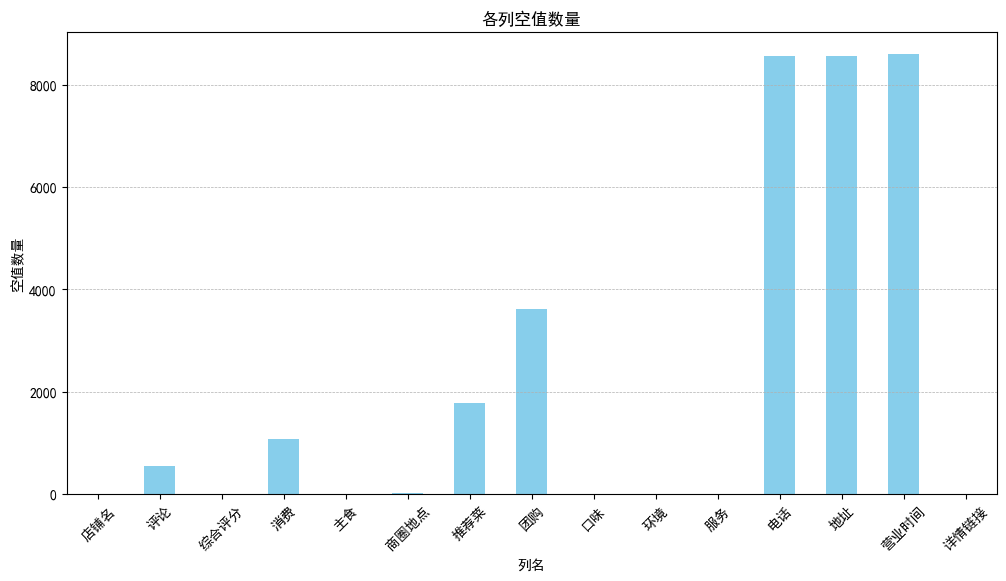

In [ ]:
missing_values = df.isnull().sum()
print("ÂêÑÂàóÁöÑÁ©∫ÂÄºÊÉÖÂÜµ:")
print(missing_values)

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('ÂêÑÂàóÁ©∫ÂÄºÊï∞Èáè')
plt.xlabel('ÂàóÂêç')
plt.ylabel('Á©∫ÂÄºÊï∞Èáè')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
print("ÂéªÈáçÂâçË°åÊï∞Ôºö", df.shape[0])

df = df.drop_duplicates(subset=['Â∫óÈì∫Âêç'])

print("ÂéªÈáçÂêéË°åÊï∞Ôºö", df.shape[0])

ÂéªÈáçÂâçË°åÊï∞Ôºö 9187
ÂéªÈáçÂêéË°åÊï∞Ôºö 8480


In [ ]:
df[['Ê∂àË¥π', 'Âè£Âë≥', 'ÁéØÂ¢É', 'ÊúçÂä°']] = df[['Ê∂àË¥π', 'Âè£Âë≥', 'ÁéØÂ¢É', 'ÊúçÂä°']].apply(pd.to_numeric, errors='coerce')
columns_of_interest = ['Ê∂àË¥π', 'Âè£Âë≥', 'ÁéØÂ¢É', 'ÊúçÂä°']

statistics = df[columns_of_interest].describe()

print("ÊèèËø∞ÊÄßÁªüËÆ°ÁªìÊûú:")
print(statistics)

ÊèèËø∞ÊÄßÁªüËÆ°ÁªìÊûú:
                Ê∂àË¥π           Âè£Âë≥           ÁéØÂ¢É           ÊúçÂä°
count  7452.000000  8478.000000  8478.000000  8478.000000
mean     72.309179     8.106369     8.101368     8.110793
std     115.107512     0.619160     0.631778     0.629059
min       3.000000     7.000000     6.300000     6.800000
25%      34.000000     7.600000     7.600000     7.600000
50%      57.000000     8.100000     8.100000     8.100000
75%      82.000000     8.600000     8.600000     8.600000
max    5847.000000     9.200000     9.200000     9.200000


ÊèèËø∞ÊÄßÁªüËÆ°ÁªìÊûú:
                Ê∂àË¥π           Âè£Âë≥           ÁéØÂ¢É           ÊúçÂä°
count  7452.000000  8478.000000  8478.000000  8478.000000
mean     72.309179     8.106369     8.101368     8.110793
std     115.107512     0.619160     0.631778     0.629059
min       3.000000     7.000000     6.300000     6.800000
25%      34.000000     7.600000     7.600000     7.600000
50%      57.000000     8.100000     8.100000     8.100000
75%      82.000000     8.600000     8.600000     8.600000
max    5847.000000     9.200000     9.200000     9.200000


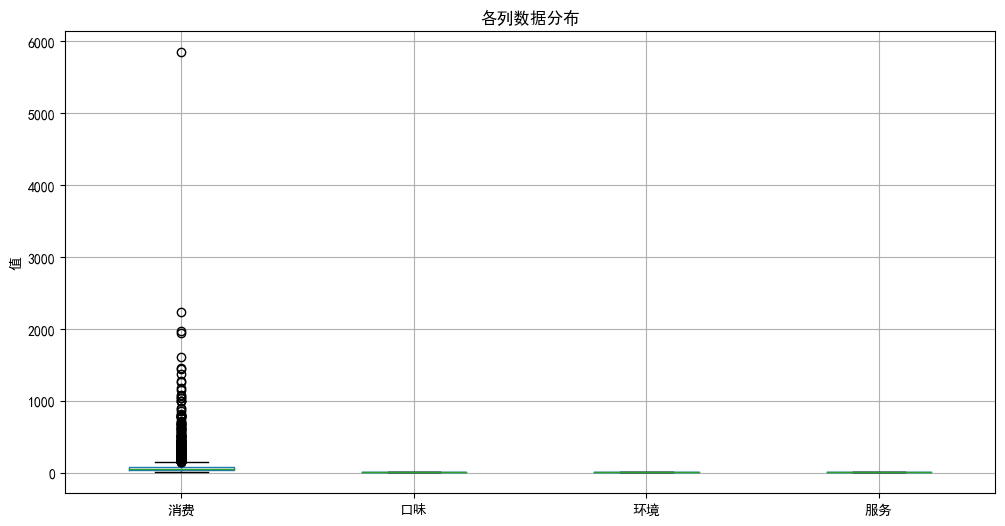

In [ ]:
columns_of_interest = ['Ê∂àË¥π', 'Âõ¢Ë¥≠', 'Âè£Âë≥', 'ÁéØÂ¢É', 'ÊúçÂä°']

statistics = df[columns_of_interest].describe()

print("ÊèèËø∞ÊÄßÁªüËÆ°ÁªìÊûú:")
print(statistics)

plt.figure(figsize=(12, 6))
df[columns_of_interest].boxplot()
plt.title('ÂêÑÂàóÊï∞ÊçÆÂàÜÂ∏É')
plt.ylabel('ÂÄº')
plt.show()

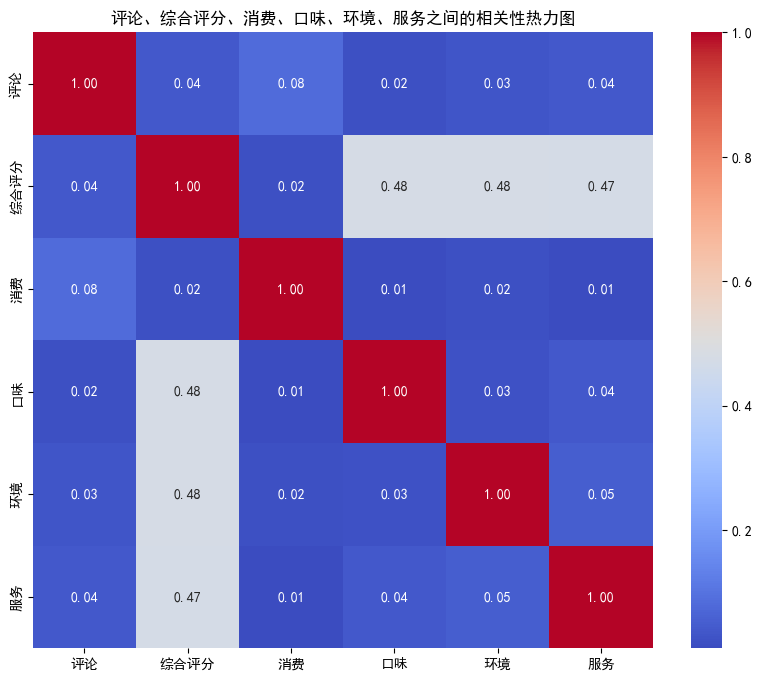

In [ ]:
import seaborn as sns
correlation_matrix = df[['ËØÑËÆ∫','ÁªºÂêàËØÑÂàÜ','Ê∂àË¥π', 'Âè£Âë≥', 'ÁéØÂ¢É', 'ÊúçÂä°']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('ËØÑËÆ∫„ÄÅÁªºÂêàËØÑÂàÜ„ÄÅÊ∂àË¥π„ÄÅÂè£Âë≥„ÄÅÁéØÂ¢É„ÄÅÊúçÂä°‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ')
plt.show()

In [ ]:
top_10_df = df.nlargest(10, 'ËØÑËÆ∫')

result_df = []

for index, row in top_10_df.iterrows():
    comment_count = row['ËØÑËÆ∫']
    main_food_preference = row['‰∏ªÈ£ü']
    result_df.append((row['Â∫óÈì∫Âêç'], comment_count, main_food_preference))

result_df = pd.DataFrame(result_df, columns=['Â∫óÈì∫Âêç', 'ËØÑËÆ∫', '‰∏ªÈ£ü'])
result_df

Â∫óÈì∫Âêç       ËØÑËÆ∫    ‰∏ªÈ£ü
0  Ëä≠Ëè≤ÁõõÂÆ¥¬∑ÁéØÁêÉÁæéÈ£ü(Èî¶Âüé‰∏áËææÂπøÂú∫Â∫ó)  32893.0   Ëá™Âä©È§ê
1      Ê±â‰∏ΩËΩ©Èü©ÂºèËá™Âä©ÁÉ§ËÇâ(SMÂ∫ó)  28475.0  ÁÉ§ËÇâËá™Âä©
2    ÁÉ§Âå†È∫ªËæ£ÁÉ§È±º(Êò•ÁÜôË∑ØÁæ§ÂÖâÂπøÂú∫Â∫ó)  25559.0    ÁÉ§È±º
3        Â∞èÈæôÂùéÁÅ´ÈîÖ(ÂÖ®ÁêÉÊóóËà∞Â∫ó)  25138.0  ÂõõÂ∑ùÁÅ´ÈîÖ
4      ÂòâÂ∑ûÂè∂Â©ÜÂ©ÜÈíµÈíµÈ∏°(Â§™Âè§ÈáåÂ∫ó)  24237.0   ÈíµÈíµÈ∏°
5       Â∞èÈæôÂùéÁÅ´ÈîÖ(Êò•ÁÜôÂ§™Âè§ÈáåÂ∫ó)  22478.0  ÂõõÂ∑ùÁÅ´ÈîÖ
6        ÁÉ§Âå†È∫ªËæ£ÁÉ§È±º(IFSÂ∫ó)  22226.0    ÁÉ§È±º
7        Ë•øÊúàÂüéË∞≠Ë±ÜËä±(Êò•ÁÜôË∑ØÂ∫ó)  20984.0    Ë±ÜËä±
8        ÂêºÂ†ÇËÄÅÁÅ´ÈîÖ(Â§™Âè§ÈáåÊÄªÂ∫ó)  20754.0  ÂõõÂ∑ùÁÅ´ÈîÖ
9          ËúÄÂ§ß‰æ†ÁÅ´ÈîÖ(Êò•ÁÜôÂ∫ó)  19890.0    ÁÅ´ÈîÖ

       ‰∏ªÈ£ü         ËØÑËÆ∫        Âç†ÊØî
23    Â∑ùËèúÈ¶Ü  1367566.0  0.166968
14   ÂõõÂ∑ùÁÅ´ÈîÖ   805676.0  0.098366
3     ‰∏≤‰∏≤È¶ô   515483.0  0.062936
102  Èù¢ÂåÖÁÉòÁÑô   380077.0  0.046404
82    Ëá™Âä©È§ê   316828.0  0.038682
..    ...        ...       ...
15    ÂÆ∂Â∏∏Ëèú      171.0  0.000021
92   Ë•øÂºèÊ≠£È§ê       95.0  0.000012
51   ÁÅ´ÈîÖËá™Âä©       53.0  0.000006
27   Âø´È§êËá™Âä©       42.0  0.000005
97   ËΩªÈ£üÊ≤ôÊãâ       33.0  0.000004

[113 rows x 3 columns]


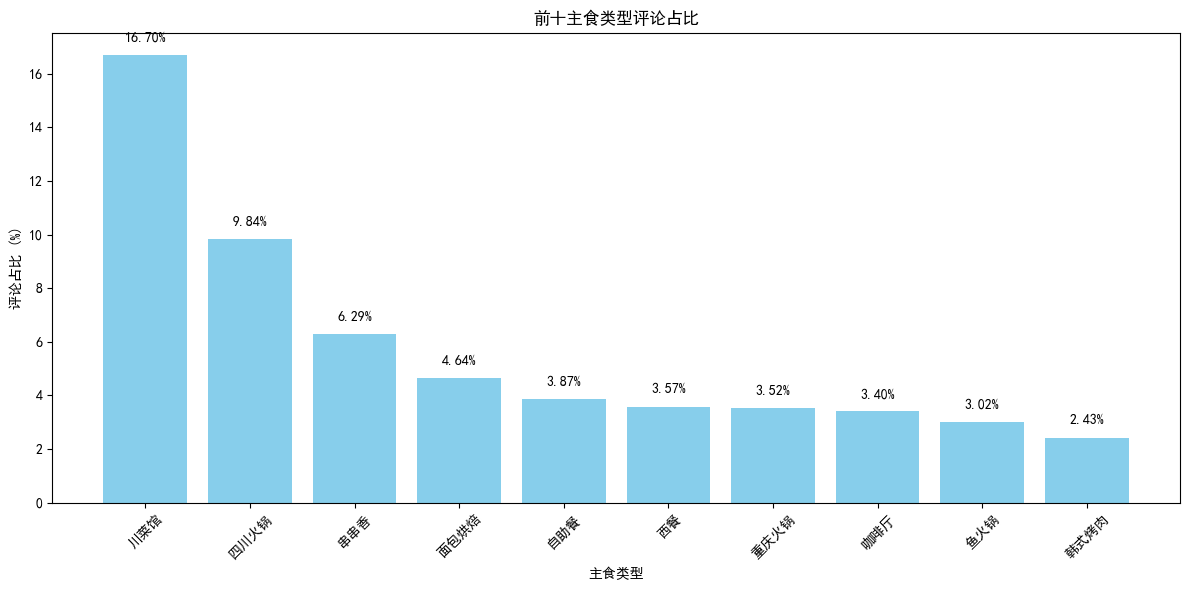

In [ ]:
main_food_counts = df.groupby('‰∏ªÈ£ü')['ËØÑËÆ∫'].sum().reset_index()

total_comments = main_food_counts['ËØÑËÆ∫'].sum()

main_food_counts['Âç†ÊØî'] = main_food_counts['ËØÑËÆ∫'] / total_comments

main_food_counts = main_food_counts.sort_values(by='Âç†ÊØî', ascending=False)

print(main_food_counts)
top_10_main_food = main_food_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_main_food['‰∏ªÈ£ü'], top_10_main_food['Âç†ÊØî'] * 100, color='skyblue')

for i, val in enumerate(top_10_main_food['Âç†ÊØî']):
    plt.text(i, val * 100 + 0.5, f'{val*100:.2f}%', ha='center')

plt.xlabel('‰∏ªÈ£üÁ±ªÂûã')
plt.ylabel('ËØÑËÆ∫Âç†ÊØî (%)')
plt.title('ÂâçÂçÅ‰∏ªÈ£üÁ±ªÂûãËØÑËÆ∫Âç†ÊØî')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

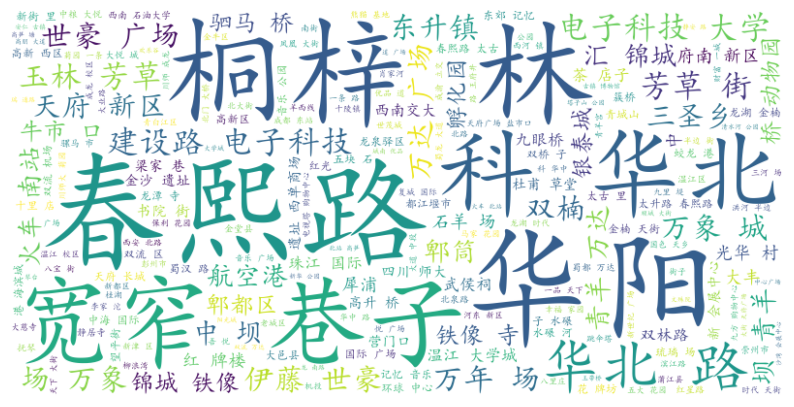

In [ ]:
stop_words_file = "stop_word.txt"
with open(stop_words_file, 'r', encoding='utf-8') as file:
    custom_stop_words = set([word.strip() for word in file.readlines()])


df['ÂïÜÂúàÂú∞ÁÇπ'] = df['ÂïÜÂúàÂú∞ÁÇπ'].fillna('')
text = ' '.join(df['ÂïÜÂúàÂú∞ÁÇπ']).lower()

words = jieba.lcut(text)

filtered_words = [word for word in words if word not in custom_stop_words]

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="simkai.ttf").generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [116]:
cookies={
  "fspop": "test",
  "_lxsdk_cuid": "18e840a0078c8-0b7c5e936ea987-26001a51-13c680-18e840a0079c8",
  "_lxsdk": "18e840a0078c8-0b7c5e936ea987-26001a51-13c680-18e840a0079c8",
  "_hc.v": "b7d45eeb-9188-2a9a-c0f7-c87565145657.1711612232",
  "Hm_lvt_602b80cf8079ae6591966cc70a3940e7": "1711612233",
  "_lx_utm": "utm_source%3DBaidu%26utm_medium%3Dorganic",
  "cy": "8",
  "cye": "chengdu",
  "s_ViewType": "10",
  "WEBDFPID": "0x48z3z89w105y38058yz2z4v6y5848381v159zxx8w9795889y17x70-2026972283301-1711612283301CQKOGWSfd79fef3d01d5e9aadc18ccd4d0c95073548",
  "qruuid": "cd3accca-81a9-42b2-bc20-41910e373511",
  "dplet": "cee45729a031b16a47ec53b438264d99",
  "dper": "0202d024488a8139cda0049f04c8c1cac1c70bd70caaf0fc47021f8cdf5ce05b5ad7f1c129c442a404faa02b58a8b795cbe55d58fba9f9daa9b000000000fa1e00002ad66f0acd459cc5c8e0321f54965ceba20c0268d771e7d54841115d167e36d7c1b04d85b97b70938f9d84259a76b1ad",
  "ll": "7fd06e815b796be3df069dec7836c3df",
  "ua": "%E7%82%B9%E5%B0%8F%E8%AF%848793679062",
  "ctu": "b764f0d09af3d6815ec1347f5abe8697a733ac86ed70e90757f954c1c642f2d0",
  "Hm_lpvt_602b80cf8079ae6591966cc70a3940e7": "1711612479",
  "_lxsdk_s": "18e840a0079-400-0f9-384%7C%7C432"
}
headers = {
  "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
  "Accept-Language": "zh-CN,zh;q=0.9",
  "Cache-Control": "max-age=0",
  "Connection": "keep-alive",
  "Referer": "https://www.dianping.com/shop/G5AC3G5C4EYZ0ixU",
  "Sec-Fetch-Dest": "document",
  "Sec-Fetch-Mode": "navigate",
  "Sec-Fetch-Site": "same-origin",
  "Sec-Fetch-User": "?1",
  "Upgrade-Insecure-Requests": "1",
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",
  "sec-ch-ua-mobile": "?0"
}

In [ ]:
file_exists = os.path.isfile('comment.csv')
with open('comment.csv', mode='a', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(['ËØÑËÆ∫'])
    for i in range(89, 150):
        url = f"https://www.dianping.com/shop/G5AC3G5C4EYZ0ixU/review_all/p{i}"
        response = requests.get(url=url, headers=headers,cookies=cookies)
        result = response.content.decode()
        comment_texts_hide = re.findall(r'<div class="review-words Hide">\s+(.*?)\s+<div class="less-words">', result, re.S)
        for idx, comment in enumerate(comment_texts_hide, start=1):
            comment_no_images = re.sub(r'<img.*?>', '', comment)
            cleaned_comment = comment_no_images.strip()
            if cleaned_comment:
                writer.writerow([cleaned_comment])
        comment_texts_no_hide = re.findall(r'<div class="review-words">\s+(.*?)\s+<div class="less-words">', result, re.S)
        for idx, comment in enumerate(comment_texts_no_hide, start=1):
            comment_no_images = re.sub(r'<img.*?>', '', comment)
            cleaned_comment = comment_no_images.strip()
            if cleaned_comment:
                writer.writerow([cleaned_comment])
        time.sleep(random.uniform(15, 20))
        print(i)

89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [4]:
data2 = pd.read_excel('comment_ÊúÄÁªà.xlsx')
data2

ËØÑËÆ∫
0     ËøôÂÆ∂ÁéØÂ¢ÉÂ§™Â•Ω‰∫ÜÔºåÂ∑¥Ëè≤ÁõõÂÆ¥ÁéØÁêÉ‰∏≠ÂøÉÂ∫óÔºåÂ∫óÈù¢ÁõõÂ§ßÔºåË±™ÂçéÔºåË¥πÁî®ÂÅèÈ´òÔºåÂèçÊ≠£ÊòØÂìÅÂ∞ùÔºåÂÄºÂæóÊâìÂç°„ÄÇ&#x0...
1     Êàë‰ª¨ÈÄâÊã©ËøôÂÆ∂Â©öÁ§ºÂ†Ç‰Ωú‰∏∫Êàë‰ª¨Áà±ÊÉÖÊïÖ‰∫ãÁöÑËßÅËØÅËÄÖÔºåËÄåËøô‰∏ÄÂ§©ÁªùÂØπË∂ÖÂá∫‰∫ÜÊàë‰ª¨ÁöÑÊúüÂæÖÔºÅÈ¶ñÂÖàÔºåËÆ©ÊàëÊù•ËØ¥ËØ¥Ëèú...
2     Ëä≠Ëè≤ÁõõÂÆ¥Ëá™Âä©‰∫ßÂìÅÔºåÊúçÂä°ÔºåÁéØÂ¢ÉÂòøÂòøÔºå‰ªäÂ§©Áªà‰∫éÊù•‰∫ÜËä≠Ëè≤ÁõõÂÆ¥ÔºÅËøôÂÆ∂Ëá™Âä©È§êÂéÖÁúüÁöÑÊòØÂ§™Ëµû‰∫Ü&#x20;...
3     Êàë‰ª¨‰∏ÄËµ∑7‰∏™‰∫∫ÔºåËøòÊòØÊå∫ÂàíÁÆóÂìíÔºåÊÄß‰ª∑ÊØîÊå∫È´òÁöÑÂïäÔºåÊµ∑È≤úÈÉΩÊòØÊ¥ªÁöÑÔºå‰∏™Â§¥‰πü‰∏çÂ∞èÔºåÂìÅÁ±ª‰πüÂæà‰∏∞ÂØåÔºåÂ∞±ÊòØÈó®...
4     ÁÆóÊòØÊàêÈÉΩÁöÑËÄÅÁâåËá™Âä©È§ê‰∫ÜÔºåÂìÅÁßçÂ§öÔºåÂ†ÇÂ≠êÂ§ßÔºåÊÄß‰ª∑ÊØîÈ´ò„ÄÇÁîüÊó•Êúâ‰ºòÊÉ†ÔºåÂ∞èÊúãÂèã1.2‰ª•‰∏äË¶ÅÊî∂Ë¥πÔºå‰∏ÄÂÆ∂‰∫∫...
...                                                 ...
1237  [ÊúçÂä°ÈìÉ]ËèúÂìÅÔºö„ÄåÁâõÊéí„Äç„ÄåÂìàÊ†πËææÊñØ„Äç„ÄåÁ¢≥ÁÉ§ÁîüËöù„Äç„ÄåÊûÅÂìÅ‰∏âÊñáÈ±ºÊãº„Äç„ÄåÊ§íÁõêÂØåË¥µÁà¨Áà¨Ëôæ„Äç„ÄåÊâáË¥ùÁ≤â‰∏ù...
1238  üöà‰ΩçÁΩÆÔºöÂ≠µÂåñÂõ≠Âú∞ÈìÅÁ´ô‰∏ãÔºåÊ•º‰∏ã‰πüÊúâÂæàÂ§öÂÖ¨‰∫§ËΩ¶Á´ô„ÄÇÂæàÊñπ‰æø„ÄÇ&#x0A;&#x0A;[ËñÑËç∑]ÁéØÂ¢ÉÔºö...
1239  5„ÄÅ6Âπ¥ÂâçÂéªËøáÂ•ΩÂá†Ê¨°ÔºåÂç∞Ë±°ÈÉΩÂæàÂ•ΩÔºåËøôÊ¨°ÂéªËøòÊòØ‰∏ÄÊ†∑ÁöÑËä≠Ëè≤ÁõõÂÆ¥ÔºåËèúÂìÅËøòÂèØ‰ª•ÔºåÁéØÂ¢ÉÂ§™ËÄÅÊóß‰∫ÜÔºåÊ°åÊ§ÖÊúâ...
1240  ÂõΩÂ∫ÜËäÇÂÅáÊúü‰∫∫ÊØîËæÉÂ§öÔºå‰∏≠ÂçàÂéªÁöÑÊàë‰ª¨Âü∫Êú¨Êª°Â∫ß„ÄÇ&#x0A;ËØ¥ËØ¥ËèúÂìÅÂêßÔºöÂë≥ÈÅìËøòÊòØ‰∏çÈîôÔºåÁÉ§ÁîüËöù„ÄÅÁÉ§È∏≠...
1241  ÊÄß‰ª∑ÊØîÂæàÈ´òÔºåËèúÂìÅ‰∏çÈîôÊ†∑ÂºèÂ§öÔºåÊúçÂä°ÁÉ≠ÊÉÖÔºÅÊé®ËçêÁªôÂ§ßÂÆ∂ÂàÜ‰∫´\t                  ...

[1242 rows x 1 columns]

In [ ]:
with open('stop_word.txt', 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file]
def remove_stopwords(text, stopwords):
    words = jieba.lcut(text)
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

data2['cleaned_comment'] = data2['ËØÑËÆ∫'].apply(lambda x: remove_stopwords(x, stopwords))
data2

ËØÑËÆ∫  \
0     ËøôÂÆ∂ÁéØÂ¢ÉÂ§™Â•Ω‰∫ÜÔºåÂ∑¥Ëè≤ÁõõÂÆ¥ÁéØÁêÉ‰∏≠ÂøÉÂ∫óÔºåÂ∫óÈù¢ÁõõÂ§ßÔºåË±™ÂçéÔºåË¥πÁî®ÂÅèÈ´òÔºåÂèçÊ≠£ÊòØÂìÅÂ∞ùÔºåÂÄºÂæóÊâìÂç°„ÄÇ&#x0...   
1     Êàë‰ª¨ÈÄâÊã©ËøôÂÆ∂Â©öÁ§ºÂ†Ç‰Ωú‰∏∫Êàë‰ª¨Áà±ÊÉÖÊïÖ‰∫ãÁöÑËßÅËØÅËÄÖÔºåËÄåËøô‰∏ÄÂ§©ÁªùÂØπË∂ÖÂá∫‰∫ÜÊàë‰ª¨ÁöÑÊúüÂæÖÔºÅÈ¶ñÂÖàÔºåËÆ©ÊàëÊù•ËØ¥ËØ¥Ëèú...   
2     Ëä≠Ëè≤ÁõõÂÆ¥Ëá™Âä©‰∫ßÂìÅÔºåÊúçÂä°ÔºåÁéØÂ¢ÉÂòøÂòøÔºå‰ªäÂ§©Áªà‰∫éÊù•‰∫ÜËä≠Ëè≤ÁõõÂÆ¥ÔºÅËøôÂÆ∂Ëá™Âä©È§êÂéÖÁúüÁöÑÊòØÂ§™Ëµû‰∫Ü&#x20;...   
3     Êàë‰ª¨‰∏ÄËµ∑7‰∏™‰∫∫ÔºåËøòÊòØÊå∫ÂàíÁÆóÂìíÔºåÊÄß‰ª∑ÊØîÊå∫È´òÁöÑÂïäÔºåÊµ∑È≤úÈÉΩÊòØÊ¥ªÁöÑÔºå‰∏™Â§¥‰πü‰∏çÂ∞èÔºåÂìÅÁ±ª‰πüÂæà‰∏∞ÂØåÔºåÂ∞±ÊòØÈó®...   
4     ÁÆóÊòØÊàêÈÉΩÁöÑËÄÅÁâåËá™Âä©È§ê‰∫ÜÔºåÂìÅÁßçÂ§öÔºåÂ†ÇÂ≠êÂ§ßÔºåÊÄß‰ª∑ÊØîÈ´ò„ÄÇÁîüÊó•Êúâ‰ºòÊÉ†ÔºåÂ∞èÊúãÂèã1.2‰ª•‰∏äË¶ÅÊî∂Ë¥πÔºå‰∏ÄÂÆ∂‰∫∫...   
...                                                 ...   
1237  [ÊúçÂä°ÈìÉ]ËèúÂìÅÔºö„ÄåÁâõÊéí„Äç„ÄåÂìàÊ†πËææÊñØ„Äç„ÄåÁ¢≥ÁÉ§ÁîüËöù„Äç„ÄåÊûÅÂìÅ‰∏âÊñáÈ±ºÊãº„Äç„ÄåÊ§íÁõêÂØåË¥µÁà¨Áà¨Ëôæ„Äç„ÄåÊâáË¥ùÁ≤â‰∏ù...   
1238  üöà‰ΩçÁΩÆÔºöÂ≠µÂåñÂõ≠Âú∞ÈìÅÁ´ô‰∏ãÔºåÊ•º‰∏ã‰πüÊúâÂæàÂ§öÂÖ¨‰∫§ËΩ¶Á´ô„ÄÇÂæàÊñπ‰æø„ÄÇ&#x0A;&#x0A;[ËñÑËç∑]ÁéØÂ¢ÉÔºö...   
1239  5„ÄÅ6Âπ¥ÂâçÂéªËøáÂ•ΩÂá†Ê¨°ÔºåÂç∞Ë±°ÈÉΩÂæàÂ•ΩÔºåËøôÊ¨°ÂéªËøòÊòØ‰∏ÄÊ†∑ÁöÑËä≠Ëè≤ÁõõÂÆ¥ÔºåËèúÂìÅËøòÂèØ‰ª•ÔºåÁéØÂ¢ÉÂ§™ËÄÅÊóß‰∫ÜÔºåÊ°åÊ§ÖÊúâ...   
1240  ÂõΩÂ∫ÜËäÇÂÅáÊúü‰∫∫ÊØîËæÉÂ§öÔºå‰∏≠ÂçàÂéªÁöÑÊàë‰ª¨Âü∫Êú¨Êª°Â∫ß„ÄÇ&#x0A;ËØ¥ËØ¥ËèúÂìÅÂêßÔºöÂë≥ÈÅìËøòÊòØ‰∏çÈîôÔºåÁÉ§ÁîüËöù„ÄÅÁÉ§È∏≠...   
1241  ÊÄß‰ª∑ÊØîÂæàÈ´òÔºåËèúÂìÅ‰∏çÈîôÊ†∑ÂºèÂ§öÔºåÊúçÂä°ÁÉ≠ÊÉÖÔºÅÊé®ËçêÁªôÂ§ßÂÆ∂ÂàÜ‰∫´\t                  ...   

                                        cleaned_comment  cluster  
0     ËøôÂÆ∂ ÁéØÂ¢É Â§™Â•Ω‰∫Ü Â∑¥Ëè≤ ÁõõÂÆ¥ ÁéØÁêÉ ‰∏≠ÂøÉÂ∫ó Â∫óÈù¢ ÁõõÂ§ß Ë±™Âçé Ë¥πÁî® ÂÅèÈ´ò ÂèçÊ≠£ ÂìÅÂ∞ù ÂÄºÂæó...        3  
1     ÈÄâÊã© ËøôÂÆ∂ Â©öÁ§º Â†Ç Áà±ÊÉÖÊïÖ‰∫ã ËßÅËØÅËÄÖ Ë∂ÖÂá∫ ÊúüÂæÖ ËØ¥ ËèúÂìÅ Ë¥®Èáè ‰∏ÄÈÅì Ëèú ‰∏ÄÂú∫ ÁæéÈ£ü Áõõ...        1  
2     Ëä≠Ëè≤ ÁõõÂÆ¥ Ëá™Âä© ‰∫ßÂìÅ ÊúçÂä° ÁéØÂ¢É Áªà‰∫é Ëä≠Ëè≤ ÁõõÂÆ¥ ËøôÂÆ∂ Ëá™Âä©È§êÂéÖ ÁúüÁöÑ Â§™Ëµû &# ÊúçÂä°...        1  
3     Êå∫ ÂàíÁÆó Âìí ÊÄß‰ª∑ÊØî Êå∫ È´ò Êµ∑È≤ú ‰∏™Â§¥ ‰∏çÂ∞è ÂìÅÁ±ª Èó®Âè£ Èó®Ëøé ÂÜ∑ÂÜ∞ÂÜ∞ ÊµÅÁ®ã ÊúØ ‰∏çÂ§™ Ëàí...        4  
4     ÁÆóÊòØ ÊàêÈÉΩ ËÄÅÁâå Ëá™Âä©È§ê ÂìÅÁßç Â†ÇÂ≠ê ÊÄß‰ª∑ÊØî È´ò ÁîüÊó• ‰ºòÊÉ† Â∞èÊúãÂèã 1.2 Êî∂Ë¥π ‰∏ÄÂÆ∂‰∫∫ ...        0  
...                                                 ...      ...  
1237  ÊúçÂä° ÈìÉ ËèúÂìÅ „Äå ÁâõÊéí „Äå ÂìàÊ†πËææÊñØ „Äå Á¢≥ ÁÉ§Áîü Ëöù „Äå ÊûÅÂìÅ ‰∏âÊñáÈ±º Êãº „Äå Ê§íÁõê ÂØå...        3  
1238  üöà ‰ΩçÁΩÆ Â≠µÂåñÂõ≠ Âú∞ÈìÅÁ´ô Ê•º‰∏ã ÂÖ¨‰∫§ËΩ¶Á´ô &# x0A &# x0A ËñÑËç∑ ÁéØÂ¢É Â••ÂÖãÊñØ ‰∏â...        3  
1239  Âπ¥ ÂâçÂéª ËøáÂ•Ω Âá†Ê¨° Âç∞Ë±° Ëä≠Ëè≤ ÁõõÂÆ¥ ËèúÂìÅ ÁéØÂ¢É Â§™ËÄÅÊóß Ê°åÊ§Ö Á†¥Êçü ÁúãÁùÄ Âçé‰∏Ω È£é ÂÆûÁî®...        1  
1240  ÂõΩÂ∫ÜËäÇ ÂÅáÊúü ‰∏≠Âçà Êª°Â∫ß &# x0A ËØ¥ ËØ¥ ËèúÂìÅ Âë≥ÈÅì ‰∏çÈîô ÁÉ§Áîü Ëöù ÁÉ§È∏≠ ËäùÂ£´ Ëôæ ...        3  
1241  ÊÄß‰ª∑ÊØî È´ò ËèúÂìÅ ‰∏çÈîô Ê†∑Âºè ÊúçÂä° ÁÉ≠ÊÉÖ Êé®Ëçê ÂàÜ‰∫´ \t                 ...        4  

[1242 rows x 3 columns]

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(x))

df['positive_score'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['negative_score'] = df['sentiment_scores'].apply(lambda x: x['neg'])

df[['cleaned_comment', 'positive_score', 'neutral_score', 'negative_score']]


NameError: name 'df' is not defined

In [ ]:
from textblob import TextBlob
df['sentiment'] = df['cleaned_comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

df[['cleaned_comment', 'sentiment', 'sentiment_category']]

cleaned_comment  sentiment  \
0     ËøôÂÆ∂ ÁéØÂ¢É Â§™Â•Ω‰∫Ü Â∑¥Ëè≤ ÁõõÂÆ¥ ÁéØÁêÉ ‰∏≠ÂøÉÂ∫ó Â∫óÈù¢ ÁõõÂ§ß Ë±™Âçé Ë¥πÁî® ÂÅèÈ´ò ÂèçÊ≠£ ÂìÅÂ∞ù ÂÄºÂæó...        0.0   
1     ÈÄâÊã© ËøôÂÆ∂ Â©öÁ§º Â†Ç Áà±ÊÉÖÊïÖ‰∫ã ËßÅËØÅËÄÖ Ë∂ÖÂá∫ ÊúüÂæÖ ËØ¥ ËèúÂìÅ Ë¥®Èáè ‰∏ÄÈÅì Ëèú ‰∏ÄÂú∫ ÁæéÈ£ü Áõõ...        0.0   
2     Ëä≠Ëè≤ ÁõõÂÆ¥ Ëá™Âä© ‰∫ßÂìÅ ÊúçÂä° ÁéØÂ¢É Áªà‰∫é Ëä≠Ëè≤ ÁõõÂÆ¥ ËøôÂÆ∂ Ëá™Âä©È§êÂéÖ ÁúüÁöÑ Â§™Ëµû &# x2...        0.0   
3     Êå∫ ÂàíÁÆó Âìí ÊÄß‰ª∑ÊØî Êå∫ È´ò Êµ∑È≤ú ‰∏™Â§¥ ‰∏çÂ∞è ÂìÅÁ±ª Èó®Âè£ Èó®Ëøé ÂÜ∑ÂÜ∞ÂÜ∞ ÊµÅÁ®ã ÊúØ ‰∏çÂ§™ Ëàí...        0.0   
4     ÁÆóÊòØ ÊàêÈÉΩ ËÄÅÁâå Ëá™Âä©È§ê ÂìÅÁßç Â†ÇÂ≠ê ÊÄß‰ª∑ÊØî È´ò ÁîüÊó• ‰ºòÊÉ† Â∞èÊúãÂèã 1.2 Êî∂Ë¥π ‰∏ÄÂÆ∂‰∫∫ ...        0.0   
...                                                 ...        ...   
1237  ÊúçÂä° ÈìÉ ËèúÂìÅ „Äå ÁâõÊéí „Äå ÂìàÊ†πËææÊñØ „Äå Á¢≥ ÁÉ§Áîü Ëöù „Äå ÊûÅÂìÅ ‰∏âÊñáÈ±º Êãº „Äå Ê§íÁõê ÂØå...        0.0   
1238  üöà ‰ΩçÁΩÆ Â≠µÂåñÂõ≠ Âú∞ÈìÅÁ´ô Ê•º‰∏ã ÂÖ¨‰∫§ËΩ¶Á´ô &# x0A &# x0A ËñÑËç∑ ÁéØÂ¢É Â••ÂÖãÊñØ ‰∏â...        0.0   
1239  Âπ¥ ÂâçÂéª ËøáÂ•Ω Âá†Ê¨° Âç∞Ë±° Ëä≠Ëè≤ ÁõõÂÆ¥ ËèúÂìÅ ÁéØÂ¢É Â§™ËÄÅÊóß Ê°åÊ§Ö Á†¥Êçü ÁúãÁùÄ Âçé‰∏Ω È£é ÂÆûÁî®...        0.0   
1240  ÂõΩÂ∫ÜËäÇ ÂÅáÊúü ‰∏≠Âçà Êª°Â∫ß &# x0A ËØ¥ ËØ¥ ËèúÂìÅ Âë≥ÈÅì ‰∏çÈîô ÁÉ§Áîü Ëöù ÁÉ§È∏≠ ËäùÂ£´ Ëôæ ...        0.0   
1241  ÊÄß‰ª∑ÊØî È´ò ËèúÂìÅ ‰∏çÈîô Ê†∑Âºè ÊúçÂä° ÁÉ≠ÊÉÖ Êé®Ëçê ÂàÜ‰∫´ \t                 ...        0.0   

     sentiment_category  
0               neutral  
1               neutral  
2               neutral  
3               neutral  
4               neutral  
...                 ...  
1237            neutral  
1238            neutral  
1239            neutral  
1240            neutral  
1241            neutral  

[1242 rows x 3 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data2['cleaned_comment'])

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_data = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

mean_tfidf = tfidf_data.mean()

top_tfidf_words = mean_tfidf.sort_values(ascending=False)[1:11]

print("Top 10 high-frequency words:")
print(top_tfidf_words)

Top 10 high-frequency words:
ËèúÂìÅ    0.047217
‰∏çÈîô    0.043696
ÊúçÂä°    0.040544
ÁéØÂ¢É    0.034076
Êµ∑È≤ú    0.031493
ËäùÂ£´    0.031407
Âë≥ÈÅì    0.030853
Êñ∞È≤ú    0.029798
Â•ΩÂêÉ    0.027941
ÊéíÈòü    0.026907
dtype: float64


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
raw_data_dir = os.path.join(os.getcwd(), '\\data\\raw')
processed_data_dir = os.path.join(os.getcwd(), '\\data\\processed')
filename_temp = pd.Series(['ÂàÜËØçÊïàÊûú'])
file_seg_effect = ''

In [28]:
t0 = time()
vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.005, stop_words=None,ngram_range=(1, 2))
X = vectorizer.fit_transform(data2['cleaned_comment'].values.astype('U'))

print("ÂÆåÊàêÊâÄËÄóË¥πÊó∂Èó¥Ôºö %fs" % (time() - t0))
print("Ê†∑Êú¨Êï∞Èáè: %d, ÁâπÂæÅÊï∞Èáè: %d" % X.shape)
print('ÁâπÂæÅÊäΩÂèñÂÆåÊàêÔºÅ')

ÂÆåÊàêÊâÄËÄóË¥πÊó∂Èó¥Ôºö 0.096220s
Ê†∑Êú¨Êï∞Èáè: 1242, ÁâπÂæÅÊï∞Èáè: 1078
ÁâπÂæÅÊäΩÂèñÂÆåÊàêÔºÅ


In [40]:
true_k = 2 #ËÅöÁ±ªÊï∞Èáè

In [ ]:
labels = data2['cleaned_comment']
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=5)

print("ÂØπÁ®ÄÁñèÊï∞ÊçÆÔºàSparse DataÔºâ ÈááÁî® %s" % km)
t0 = time()
km.fit(X)
print("ÂÆåÊàêÊâÄËÄóË¥πÊó∂Èó¥Ôºö%0.3fs" % (time() - t0))
print()

print("HomogeneityÂÄº: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("CompletenessÂÄº: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measureÂÄº: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-IndexÂÄº: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette CoefficientÂÄº: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

label_prediction = km.predict(X)   
label_prediction = list(label_prediction)

ÂØπÁ®ÄÁñèÊï∞ÊçÆÔºàSparse DataÔºâ ÈááÁî® KMeans(n_clusters=2, n_init=5)
ÂÆåÊàêÊâÄËÄóË¥πÊó∂Èó¥Ôºö0.024s

HomogeneityÂÄº: 0.085
CompletenessÂÄº: 1.000
V-measureÂÄº: 0.158
Adjusted Rand-IndexÂÄº: 0.000
Silhouette CoefficientÂÄº: 0.025



In [ ]:
print("ÊØè‰∏™ËÅöÁ±ªÁöÑTOPÂÖ≥ÈîÆËØç:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

if hasattr(vectorizer,'get_feature_names_out'):
    terms = vectorizer.get_feature_names_out()
elif hasattr(vectorizer,'get_feature_names'):
    terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Á∞áÁæ§ %d   " % (i+1), end='')
    print("ËØ•Á∞áÁæ§ÊâÄÂê´ÊñáÊ°£Âç†ÊØî‰∏∫",'%.4f%%' % (int(label_prediction.count(i))/int(len(data2['cleaned_comment']))))
    print("Á∞áÁæ§ÂÖ≥ÈîÆËØçÔºö")
    wordset = []
    for ind in order_centroids[i, :20]:
        wordset.append(terms[ind].replace(' ',''))
    for word in wordset:
        print(' %s ' % word, end='')
    print('\n------------------------------------------------------------------------------------------------')

ÊØè‰∏™ËÅöÁ±ªÁöÑTOPÂÖ≥ÈîÆËØç:
Á∞áÁæ§ 1   ËØ•Á∞áÁæ§ÊâÄÂê´ÊñáÊ°£Âç†ÊØî‰∏∫ 0.2979%
Á∞áÁæ§ÂÖ≥ÈîÆËØçÔºö
 x0a  ÊúçÂä°  x0ax0a  ÁéØÂ¢É  x0aÊúçÂä°  ‰∏çÈîô  ËñÑËç∑  ËñÑËç∑ÁéØÂ¢É  ÊúçÂä°ÊúçÂä°  ËäùÂ£´  ÁéØÂ¢Éx0a  ËèúÂìÅ  ÊúçÂä°x0a  Âë≥ÈÅì  x0aËèúÂìÅ  ÁâõÊéí  ÂìàÊ†πËææÊñØ  ÊÑüËßâ  Â•ΩÂêÉ  Êµ∑È≤ú 
------------------------------------------------------------------------------------------------
Á∞áÁæ§ 2   ËØ•Á∞áÁæ§ÊâÄÂê´ÊñáÊ°£Âç†ÊØî‰∏∫ 0.7021%
Á∞áÁæ§ÂÖ≥ÈîÆËØçÔºö
 ËèúÂìÅ  ‰∏çÈîô  Êµ∑È≤ú  Âë≥ÈÅì  Êñ∞È≤ú  ÊéíÈòü  ËäùÂ£´  Â•ΩÂêÉ  ÂñúÊ¨¢  Ëá™Âä©È§ê  ÊÑüËßâ  ÁâõÊéí  Ëä≠Ëè≤  ÊÄß‰ª∑ÊØî  ÁâπÂà´  Ëá™Âä©  Â∞èÊúãÂèã  ÁõõÂÆ¥  ÁéØÂ¢É  ÁúüÁöÑ 
------------------------------------------------------------------------------------------------


In [43]:
labels=km.labels_.tolist()
#l =  km.fit_predict(X)  
svd = TruncatedSVD(n_components=2).fit(X)
datapoint = svd.transform(X)

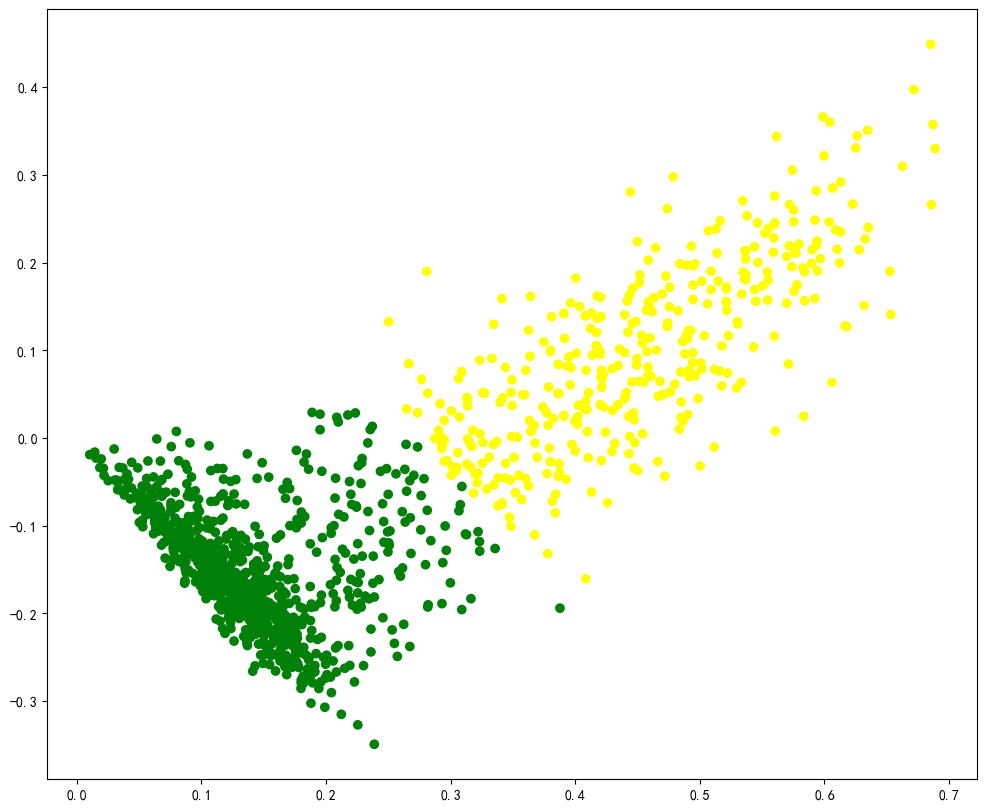

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 10))
label1 = [
'#FFFF00', '#008008', '#0000FF','#800080','#FFF5EE','#98FB98','#A0522D',
'#FF7F00','#FFC125','#FFFFFF','#FFFAFA','#FFF68F','#FFEFD5','#FFE4E1',
'#FFDEAD','#FFC1C1','#FFB90F','#FFA54F','#FF8C00','#C0FF3E','#FF6EB4',
'#FF4500','#FF3030','#8A2BE2','#87CEEB','#8470FF','#828282','#7EC0EE',
'#7CFC00','#7A8B8B','#79CDCD','#76EE00']

color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

plt.show()

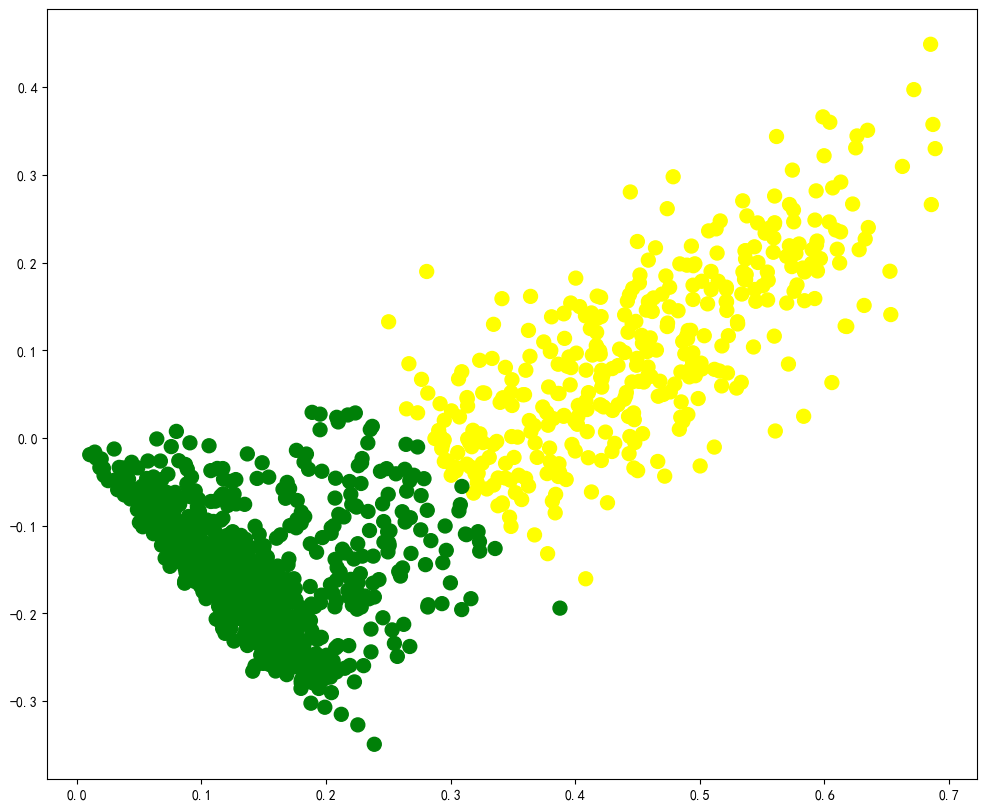

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 10))
label1 = [
    '#FFFF00', '#008008', '#0000FF','#800080','#FFF5EE','#98FB98','#A0522D',
    '#FF7F00','#FFC125','#FFFFFF','#FFFAFA','#FFF68F','#FFEFD5','#FFE4E1',
    '#FFDEAD','#FFC1C1','#FFB90F','#FFA54F','#FF8C00','#C0FF3E','#FF6EB4',
    '#FF4500','#FF3030','#8A2BE2','#87CEEB','#8470FF','#828282','#7EC0EE',
    '#7CFC00','#7A8B8B','#79CDCD','#76EE00'
]

color = [label1[i] for i in labels]

bubble_size = 100

plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color, s=bubble_size)

plt.show()


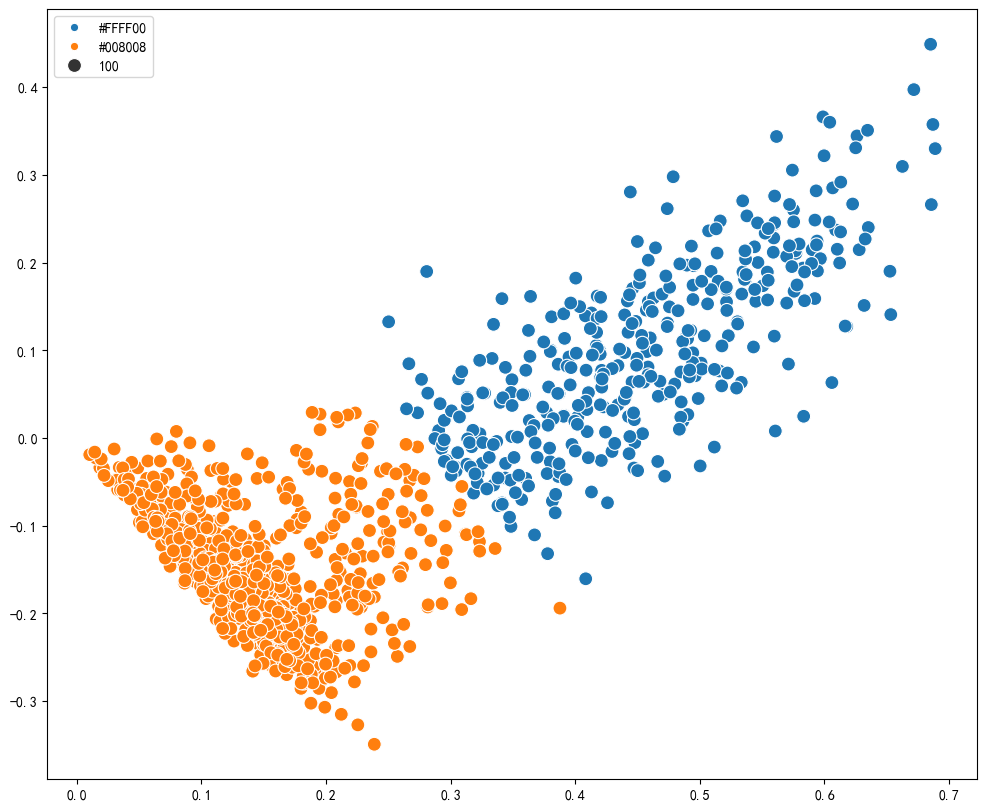

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
label1 = [
    '#FFFF00', '#008008', '#0000FF','#800080','#FFF5EE','#98FB98','#A0522D',
    '#FF7F00','#FFC125','#FFFFFF','#FFFAFA','#FFF68F','#FFEFD5','#FFE4E1',
    '#FFDEAD','#FFC1C1','#FFB90F','#FFA54F','#FF8C00','#C0FF3E','#FF6EB4',
    '#FF4500','#FF3030','#8A2BE2','#87CEEB','#8470FF','#828282','#7EC0EE',
    '#7CFC00','#7A8B8B','#79CDCD','#76EE00'
]

color = [label1[i] for i in labels]

bubble_size = 100

sns.scatterplot(x=datapoint[:, 0], y=datapoint[:, 1], hue=color, size=bubble_size, sizes=(bubble_size, bubble_size))

plt.show()
